In [1]:
# path='/Documents/Share/Tanvi/'
path=''
print(path)
dir_data = path+"voc_prepared/voc_prepped"
dir_seg = dir_data + "/annotations_prepped_train/"
dir_img = dir_data + "/images_prepped_train/"
dir_seg_test = dir_data + "/annotations_prepped_test/"
dir_img_test = dir_data + "/images_prepped_test/"

In [2]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab.patches import cv2_imshow

## seaborn has white grid by default so I will get rid of this.
sns.set_style("whitegrid", {'axes.grid' : False})


ldseg = np.array(os.listdir(dir_seg))
## pick the first image file
print(len(ldseg))
fnm = ldseg[1]
print(fnm)


## read in the original image and segmentation labels
seg = cv2.imread(dir_seg + fnm ) # (360, 480, 3)
name = fnm[:-4]
fnm=name+".jpg"
print(fnm)
img_is = cv2.imread(dir_img + fnm )
# cv2.imshow('label',seg)

#print("seg.shape={}, img_is.shape={}".format(seg.shape,img_is.shape))

## Check the number of labels
mi, ma = np.min(seg), np.max(seg)
n_classes = 21
print("minimum seg = {}, maximum seg = {}, Total number of segmentation classes = {}".format(mi,ma, n_classes))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.imshow(img_is)
ax.set_title("original image")
# plt.show()

fig = plt.figure(figsize=(15,10))
for k in range(mi,ma+1):
    ax = fig.add_subplot(3,n_classes/3,k+1)
    ax.imshow((seg == k)*1.0)
    ax.set_title("label = {}".format(k))
plt.show()

1474
2010_001619.png
2010_001619.jpg
minimum seg = 0, maximum seg = 15, Total number of segmentation classes = 21


<Figure size 500x500 with 1 Axes>

<Figure size 1500x1000 with 16 Axes>

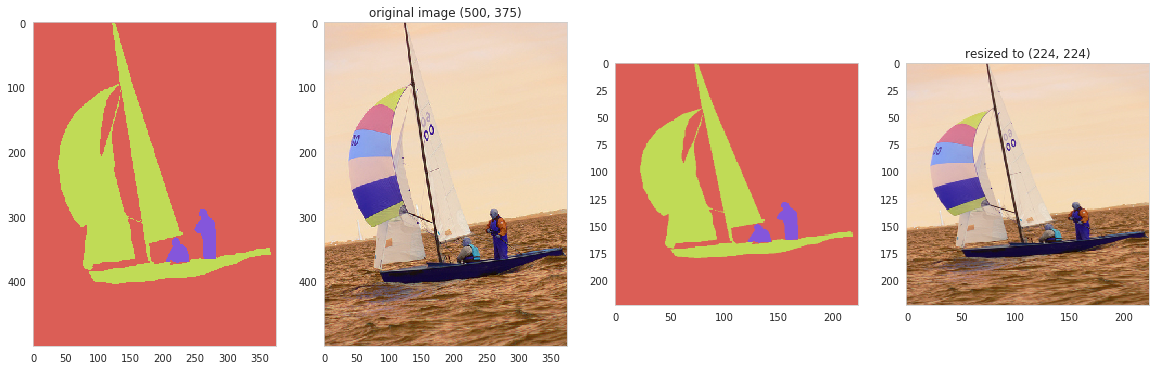

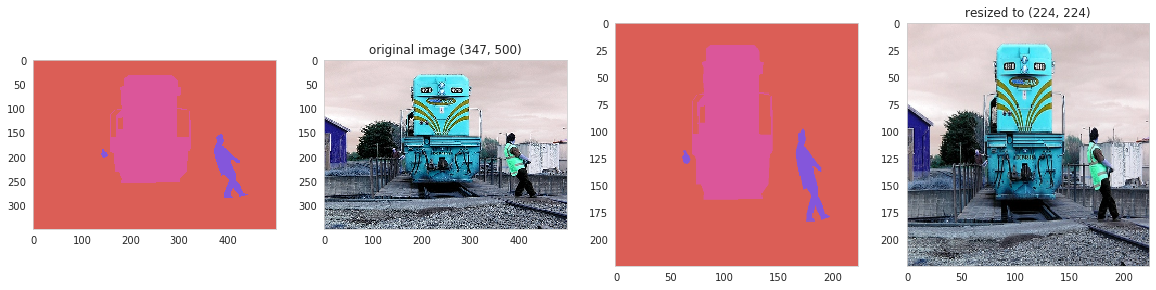

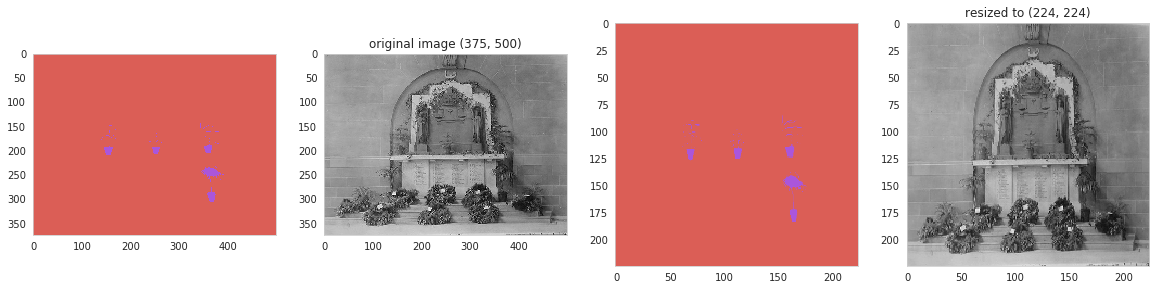

In [3]:
import random
def give_color_to_seg_img(seg,n_classes):
    '''
    seg : (input_width,input_height,3)
    '''
    
    if len(seg.shape)==3:
        seg = seg[:,:,0]
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

input_height , input_width = 224 , 224
output_height , output_width = 224 , 224


ldseg = np.array(os.listdir(dir_seg))
for fnm in ldseg[np.random.choice(len(ldseg),3,replace=False)]:
    fnm = fnm.split(".")[0]
    seg = cv2.imread(dir_seg + fnm + ".png") # (360, 480, 3)
    img_is = cv2.imread(dir_img + fnm + ".jpg")
    seg_img = give_color_to_seg_img(seg,n_classes)

    fig = plt.figure(figsize=(20,40))
    ax = fig.add_subplot(1,4,1)
    ax.imshow(seg_img)
    
    ax = fig.add_subplot(1,4,2)
    ax.imshow(img_is/255.0)
    ax.set_title("original image {}".format(img_is.shape[:2]))
    
    ax = fig.add_subplot(1,4,3)
    ax.imshow(cv2.resize(seg_img,(input_height , input_width)))
    
    ax = fig.add_subplot(1,4,4)
    ax.imshow(cv2.resize(img_is,(output_height , output_width))/255.0)
    ax.set_title("resized to {}".format((output_height , output_width)))
    plt.show()


In [4]:
def getImageArr( path , width , height ):
        img = cv2.imread(path, 1)
        img = np.float32(cv2.resize(img, ( width , height ))) / 127.5 - 1
        return img

def getSegmentationArr( path , nClasses ,  width , height  ):

    seg_labels = np.zeros((  height , width  , nClasses ))
    img = cv2.imread(path, 1)
    img = cv2.resize(img, ( width , height ))
    img = img[:, : , 0]

    for c in range(nClasses):
        seg_labels[: , : , c ] = (img == c ).astype(int)
    ##seg_labels = np.reshape(seg_labels, ( width*height,nClasses  ))
    return seg_labels




images = os.listdir(dir_img)
images.sort()
segmentations  = os.listdir(dir_seg)
segmentations.sort()
    
X_train = []
Y_train = []

count=0
for im , seg in zip(images,segmentations) :
  if count<=700:
    X_train.append( getImageArr(dir_img + im , input_width , input_height )  )
    Y_train.append( getSegmentationArr( dir_seg + seg , n_classes , output_width , output_height )  )
  else:
    break
  count=count+1 

X_train, Y_train = np.array(X_train) , np.array(Y_train)
print(X_train.shape,Y_train.shape)



(701, 224, 224, 3) (701, 224, 224, 21)


In [5]:
test_images = os.listdir(dir_img_test)
test_images.sort()
test_segmentations  = os.listdir(dir_seg_test)
test_segmentations.sort()
    
X_test = []
Y_test = []

count=0
for im , seg in zip(test_images,test_segmentations) :
  if count<=200:
    X_test.append( getImageArr(dir_img_test + im , input_width , input_height )  )
    Y_test.append( getSegmentationArr( dir_seg_test + seg , n_classes , output_width , output_height )  )
  else:
    break
  count=count+1 

X_test, Y_test = np.array(X_test) , np.array(Y_test)
print(X_test.shape,Y_test.shape)



(201, 224, 224, 3) (201, 224, 224, 21)


In [6]:
VGG_Weights_path = path+"vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [7]:
# import h5py
# with h5py.File(path+'train_images.h5', 'w') as hf:
#     hf.create_dataset("train_images",  data=X_train)

In [8]:
# with h5py.File(path+'train_segmented_images.h5', 'w') as hf:
#     hf.create_dataset("train_segmented_images",  data=Y_train)

In [9]:
# with h5py.File(path+'test_images.h5', 'w') as hf:
#     hf.create_dataset("test_images",  data=X_test)

In [10]:
# with h5py.File(path+'test_segmented_images.h5', 'w') as hf:
#     hf.create_dataset("test_segmented_images",  data=Y_test)

In [11]:

import h5py
h5f = h5py.File(path+'train_images.h5','r')
X_train = h5f['train_images'][:]
print(X_train.shape)
h5f = h5py.File(path+'train_segmented_images.h5','r')
Y_train = h5f['train_segmented_images'][:]
print(Y_train.shape)

(701, 224, 224, 3)
(701, 224, 224, 21)


In [12]:

h5f = h5py.File(path+'test_images.h5','r')
X_test = h5f['test_images'][:]
print(X_test.shape)
h5f = h5py.File(path+'test_segmented_images.h5','r')
Y_test = h5f['test_segmented_images'][:]
print(Y_test.shape)

(201, 224, 224, 3)
(201, 224, 224, 21)


In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.backend.tensorflow_backend import set_session
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
import pandas as pd 
import os
warnings.filterwarnings("ignore")

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.95

# config.gpu_options.allow_growth = True

config.gpu_options.visible_device_list = "0" 

set_session(tf.Session(config=config))   

print("python {}".format(sys.version))
print("keras version {}".format(keras.__version__)); del keras
print("tensorflow version {}".format(tf.__version__))

ImportError: Traceback (most recent call last):
  File "/home/irlab/.local/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/irlab/.local/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/irlab/.local/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/usr/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/usr/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.9.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [8]:
import tensorflow as tf
tf.test.gpu_device_name()

ImportError: Traceback (most recent call last):
  File "/home/irlab/.local/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/irlab/.local/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/irlab/.local/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/usr/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/usr/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.9.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [15]:
pip install --upgrade tensorflow-gpu==1.8.0

    100% |████████████████████████████████| 216.3MB 11kB/s eta 0:00:0111
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/d2/ab/43e678759326f728de861edbef34b8e2ad1b1490505f20e0d1f0716c3bf4/numpy-1.17.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/26/32b8464df2a97e6dd1b656ed26b2c194606c16fe163c695a992b36c11cdf/six-1.13.0-py2.py3-none-any.whl
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 3.1MB 579kB/s ta 0:00:011
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/d1/4f/950dfae467b384fc96bc6469de25d832534f6b4441033c39f914efd13418/astor-0.8.0-py2.py3-none-any.whl
  Cache entry deserialization failed, entry ignored
  Cache entry de

In [7]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16891945017611035554, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2845162183935351295
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3691765696098415622
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10947097395
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17297392603692995159
 physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [10]:
n_classes=21
def FCN8( nClasses ,  input_height=224, input_width=224):
    ## input_height and width must be devisible by 32 because maxpooling with filter size = (2,2) is operated 5 times,
    ## which makes the input_height and width 2^5 = 32 times smaller
    assert input_height%32 == 0
    assert input_width%32 == 0
    IMAGE_ORDERING =  "channels_last" 

    img_input = Input(shape=(input_height,input_width, 3)) ## Assume 224,224,3
    
    ## Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', data_format=IMAGE_ORDERING )(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool', data_format=IMAGE_ORDERING )(x)
    f1 = x
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool', data_format=IMAGE_ORDERING )(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool', data_format=IMAGE_ORDERING )(x)
    pool3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3', data_format=IMAGE_ORDERING )(x)
    pool4 = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool', data_format=IMAGE_ORDERING )(x)## (None, 14, 14, 512) 

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1', data_format=IMAGE_ORDERING )(pool4)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3', data_format=IMAGE_ORDERING )(x)
    pool5 = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool', data_format=IMAGE_ORDERING )(x)## (None, 7, 7, 512)

    #x = Flatten(name='flatten')(x)
    #x = Dense(4096, activation='relu', name='fc1')(x)
    # <--> o = ( Conv2D( 4096 , ( 7 , 7 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(4096, activation='relu', name='fc2')(x)
    # <--> o = ( Conv2D( 4096 , ( 1 , 1 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)   
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(1000 , activation='softmax', name='predictions')(x)
    # <--> o = ( Conv2D( nClasses ,  ( 1 , 1 ) ,kernel_initializer='he_normal' , data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    
    vgg  = Model(  img_input , pool5  )
    vgg.load_weights(VGG_Weights_path) ## loading VGG weights for the encoder parts of FCN8
    
    n = 4096
    o = ( Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6", data_format=IMAGE_ORDERING))(pool5)
    conv7 = ( Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7", data_format=IMAGE_ORDERING))(o)
    
    
    ## 4 times upsamping for pool4 layer
    conv7_4 = Conv2DTranspose( nClasses , kernel_size=(4,4) ,  strides=(4,4) , use_bias=False, data_format=IMAGE_ORDERING )(conv7)
    ## (None, 224, 224, 10)
    ## 2 times upsampling for pool411
    pool411 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool4_11", data_format=IMAGE_ORDERING))(pool4)
    pool411_2 = (Conv2DTranspose( nClasses , kernel_size=(2,2) ,  strides=(2,2) , use_bias=False, data_format=IMAGE_ORDERING ))(pool411)
    
    pool311 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool3_11", data_format=IMAGE_ORDERING))(pool3)
        
    o = Add(name="add")([pool411_2, pool311, conv7_4 ])
    o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False, data_format=IMAGE_ORDERING )(o)
    o = (Activation('softmax'))(o)
    
    model = Model(img_input, o)

    return model

model = FCN8(nClasses     = n_classes,  input_height = 224, input_width  = 224)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [11]:

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1464, 224, 224, 3) (1464, 224, 224, 21)
(1464, 224, 224, 3) (1464, 224, 224, 21)


In [12]:
from sklearn.utils import shuffle
test_rate = 0.85
index_test = np.random.choice(X_test.shape[0],int(X_test.shape[0]*test_rate),replace=False)
index_val  = list(set(range(X_test.shape[0])) - set(index_test))
print(index_test)       
x_test, y_test = shuffle(X_test,Y_test)
X_test, Y_test = x_test[index_test],y_test[index_test]
X_val, Y_val = x_test[index_val],y_test[index_val]

[ 678   76  341 ...  827 1173  990]


In [13]:
from keras import optimizers


sgd = optimizers.SGD(lr=1E-2, decay=5**(-4), momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

hist1 = model.fit(X_train,Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=32,epochs=200,verbose=2)


Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 1464 samples, validate on 220 samples
Epoch 1/200


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node block1_conv1_1/convolution}}]]
	 [[{{node loss/mul}}]]

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14247485993775465853
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8789470972717293203
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17999970291091054612
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10783853773
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14556414732470860931
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [0]:
new_model6.save(path+'my_model_08.hdf5')

In [0]:
from keras.models import load_model
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
new_model8 = load_model(path+'my_model_09.hdf5')

In [0]:
from keras import optimizers

sgd = optimizers.SGD(lr=1E-2, decay=5**(-4), momentum=0.9, nesterov=True)
new_model8.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

hist1 = new_model8.fit(X_train,y_train,
                  validation_data=(X_test,y_test),
                  batch_size=64,epochs=100,verbose=2)
new_model8.save(path+'my_model_010.hdf5')

Using TensorFlow backend.


NameError: ignored

In [0]:
#new_model.save(path+'my_model_02.hdf5')

In [0]:
from keras.models import load_model
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
new_model2 = load_model(path+'my_model_03.hdf5')

In [0]:
for key in ['loss', 'val_loss']:
    plt.plot(new_model5.history[key],label=key)
plt.legend()
plt.show()

AttributeError: ignored

(136, 224, 224)


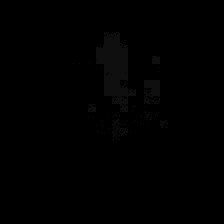

(136, 224, 224) (136, 224, 224)


In [0]:
y_pred = new_model6.predict(X_test)
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test, axis=3)
print(y_predi.shape)
# cv2.imshow(y_predi[12])
print(y_testi.shape,y_predi.shape)

In [0]:
def IoU(Yi,y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = 21
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean IoU: {:4.3f}".format(mIoU))
    
IoU(y_testi,y_predi)

class 00: #TP=5191336, #FP=1512482, #FN=39103, IoU=0.770
class 01: #TP=     0, #FP=    45, #FN=55428, IoU=0.000
class 02: #TP=     0, #FP=     0, #FN=26384, IoU=0.000
class 03: #TP=     0, #FP=     1, #FN=41024, IoU=0.000
class 04: #TP=     0, #FP=    36, #FN=50358, IoU=0.000
class 05: #TP=     0, #FP=     0, #FN=75352, IoU=0.000
class 06: #TP=     3, #FP=  1532, #FN=51529, IoU=0.000
class 07: #TP=    40, #FP=    67, #FN=113295, IoU=0.000
class 08: #TP=     0, #FP=    34, #FN=115765, IoU=0.000
class 09: #TP=     0, #FP=     0, #FN=63448, IoU=0.000
class 10: #TP=     0, #FP=    11, #FN=23184, IoU=0.000
class 11: #TP=  7611, #FP= 16337, #FN=106024, IoU=0.059
class 12: #TP=     0, #FP=    15, #FN=82367, IoU=0.000
class 13: #TP=     0, #FP=     5, #FN=42879, IoU=0.000
class 14: #TP=     0, #FP=    15, #FN=64857, IoU=0.000
class 15: #TP= 27419, #FP= 65993, #FN=319630, IoU=0.066
class 16: #TP=     0, #FP=     0, #FN=50413, IoU=0.000
class 17: #TP=     0, #FP=    13, #FN=56536, IoU=0.000
clas

In [0]:
def IoU(Yi,y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = 21
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean IoU: {:4.3f}".format(mIoU))
    
IoU(y_testi,y_predi)

class 00: #TP=4941601, #FP=1283509, #FN=288838, IoU=0.759
class 01: #TP=    38, #FP=  1727, #FN=55390, IoU=0.001
class 02: #TP=     0, #FP=     0, #FN=26384, IoU=0.000
class 03: #TP=     0, #FP=   108, #FN=41024, IoU=0.000
class 04: #TP=    15, #FP=   221, #FN=50343, IoU=0.000
class 05: #TP=     0, #FP=    43, #FN=75352, IoU=0.000
class 06: #TP=   175, #FP=105485, #FN=51357, IoU=0.001
class 07: #TP=  1091, #FP=  6522, #FN=112244, IoU=0.009
class 08: #TP=     2, #FP=  2212, #FN=115763, IoU=0.000
class 09: #TP=     0, #FP=     0, #FN=63448, IoU=0.000
class 10: #TP=     0, #FP=   206, #FN=23184, IoU=0.000
class 11: #TP=  7824, #FP= 40609, #FN=105811, IoU=0.051
class 12: #TP=     3, #FP=   454, #FN=82364, IoU=0.000
class 13: #TP=    32, #FP=   281, #FN=42847, IoU=0.001
class 14: #TP=    12, #FP=   143, #FN=64845, IoU=0.000
class 15: #TP= 68203, #FP=316931, #FN=278846, IoU=0.103
class 16: #TP=     0, #FP=     0, #FN=50413, IoU=0.000
class 17: #TP=     0, #FP=   600, #FN=56536, IoU=0.000
cla

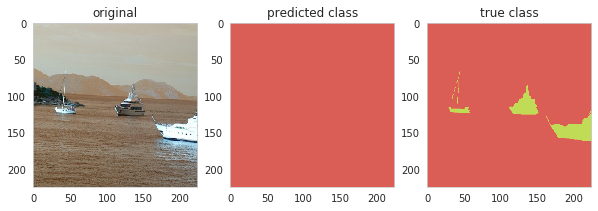

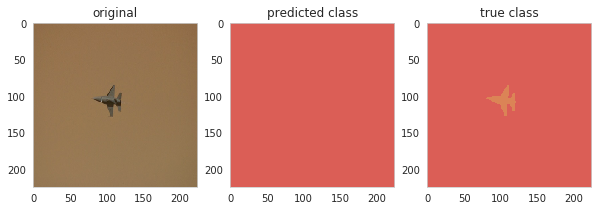

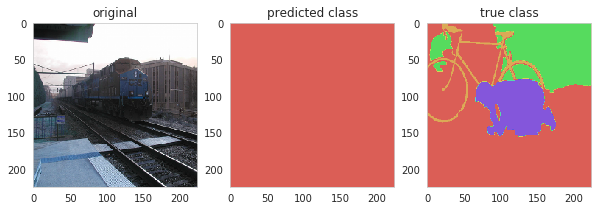

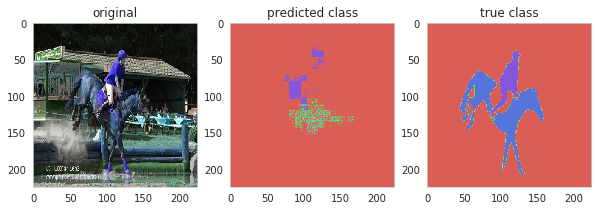

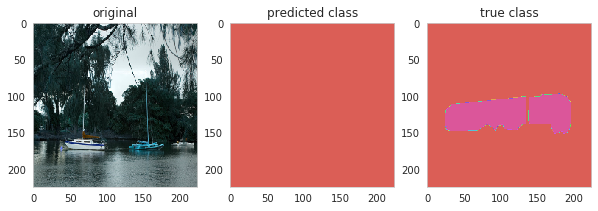

In [0]:
shape = (224,224)
n_classes= 21

for i in range(5):
    img_is  = (X_test[i] + 1)*(255.0/2)
    seg = y_predi[i]
    segtest = y_testi[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is/255.0)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img(seg,n_classes))
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(give_color_to_seg_img(segtest,n_classes))
    ax.set_title("true class")
    plt.show()

In [0]:
histories = []
histories.append(hist1)

In [0]:
# model.save(path+'my_model_01.hdf5')
